In [ ]:
import cv2


#Input image
path='/content/sample_data/77.jpg'
#Read image
image=cv2.imread(path,cv2.IMREAD_COLOR)
#Image cropping
img=image[30:410,30:560]

In [ ]:
grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )
#Black hat filter
kernel = cv2.getStructuringElement(1,(9,9))
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
#Gaussian filter
bhg= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
#Binary thresholding (MASK)
ret,mask = cv2.threshold(bhg,10,255,cv2.THRESH_BINARY)
#Replace pixels of the mask
dst = cv2.inpaint(img,mask,6,cv2.INPAINT_TELEA)

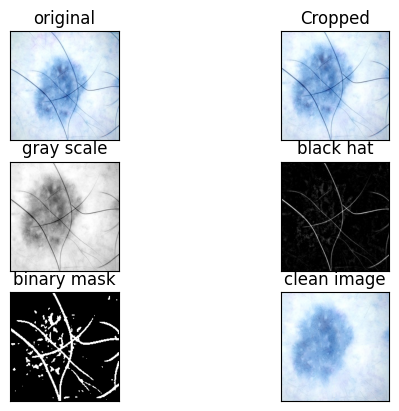

In [ ]:
titles = ["original","Cropped","gray scale","black hat","binary mask","clean image"]
images = [image,img,grayScale,blackhat,mask,dst]

#if you want then plot it
from matplotlib import pyplot as plt
for i in range(len(titles)):
    plt.subplot(3,2, i+1),
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])